In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer
import statsmodels.formula.api as smf
%matplotlib inline

# Daten importieren

In [2]:
df = sns.load_dataset('titanic')

- Survived: Indicates whether a passenger survived (1) or did not survive (0).
- Pclass (Passenger Class): The class of the ticket the passenger purchased (1st, 2nd, or 3rd).
- Sex: The gender of the passenger.
- Age: The age of the passenger.
- SibSp: Number of siblings/spouses aboard the Titanic.
- Parch: Number of parents/children aboard the Titanic.
- Ticket: Ticket number.
- Fare: Passenger fare.
- Cabin: Cabin number.
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

# Daten überprüfen (NAs, Ausreißer, usw..)

Die Dimensionen des Datensatzes.

In [3]:
df.shape

(891, 15)

Überblick über die Daten

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Datentypen der Variablen

In [6]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Fehlende Werte

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Umgang mit fehlenden Werten und Ausreißern

Wir wählen nur einige Variablen von Interesse

In [8]:
df = df[['survived', 'pclass', 'sex', 'age', 'fare']]

Für die fehlenden Werte verwenden wir den Modalwert des Alters 

In [33]:
age_mode = df['age'].mode()[0]
age_mode

24.0

In [34]:
df['age'] = df['age'].fillna(age_mode)

Letzter Check

In [11]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
dtype: int64

Dummy-Variable für Geschlecht erstellen (1 = male)

In [35]:
df['gender'] = df['sex'].map({'male': 1, 'female': 0})
df.head()

,survived,pclass,sex,age,fare,gender,class_2,class_3
0,0,3,male,22.0,7.2500,1,0,1
1,1,1,female,38.0,71.2833,0,0,0
2,1,3,female,26.0,7.9250,0,0,1
3,1,1,female,35.0,53.1000,0,0,0
4,0,3,male,35.0,8.0500,1,0,1


# Datenvisualisierung

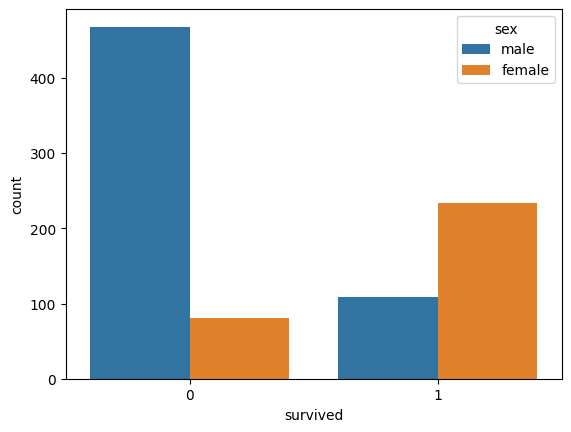

In [13]:
plt.figure(figsize = (5, 5))

sns.countplot(data = df,
              x = 'survived',
              hue = 'sex');

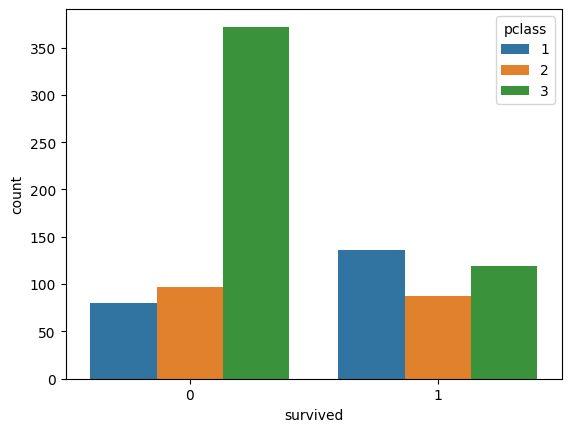

In [14]:
plt.figure(figsize = (5, 5))

sns.countplot(data = df,
              x = 'survived',
              hue = 'pclass');

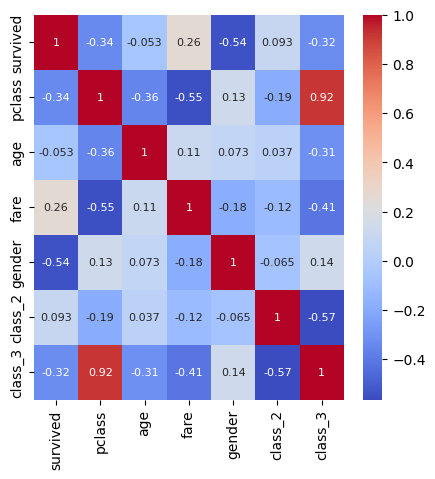

In [52]:
plt.figure(figsize = (5, 5))

sns.heatmap(
    df.select_dtypes(np.number).corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {"size": 8}
);

In [16]:
#plt.scatter(df['fare'], df['survived'], alpha=0.5);

# Logistische Regression

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [17]:
df_dummies = pd.get_dummies(df['pclass'], 
                            prefix = 'class', 
                            drop_first = True)

In [18]:
df = pd.concat([df, df_dummies], axis = 1)

In [36]:
df.head()

,survived,pclass,sex,age,fare,gender,class_2,class_3
0,0,3,male,22.0,7.2500,1,0,1
1,1,1,female,38.0,71.2833,0,0,0
2,1,3,female,26.0,7.9250,0,0,1
3,1,1,female,35.0,53.1000,0,0,0
4,0,3,male,35.0,8.0500,1,0,1


In [37]:
reg1 = smf.logit('survived ~ gender', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.515041
         Iterations 5


In [38]:
print(reg1.summary())

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Dec 2023   Pseudo R-squ.:                  0.2266
Time:                        11:18:30   Log-Likelihood:                -458.90
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.020e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0566      0.129      8.191      0.000       0.804       1.309
gender        -2.5137      0.167    -15.036      0.000      -2.841      -2.186


In [39]:
reg2 = smf.logit('survived ~ gender + class_3', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.470741
         Iterations 6


In [40]:
print(reg2.summary())

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Fri, 22 Dec 2023   Pseudo R-squ.:                  0.2931
Time:                        11:18:37   Log-Likelihood:                -419.43
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.002e-76
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8878      0.178     10.628      0.000       1.540       2.236
gender        -2.6067      0.182    -14.337      0.000      -2.963      -2.250
class_3       -1.5125      0.178     -8.482      0.0

In [41]:
Stargazer([reg1, reg2])

# Wie hoch ist die Wahrscheinlichkeit, dass ein Mann in der dritten Klasse überlebt? Und für eine Frau in der ersten Klasse?

In [ ]:
from statsmodels.api import add_constant

In [48]:
X_predict = pd.DataFrame({
    'class_3': [1, 0],           
    'gender': [1, 0]        
})

X_predict = add_constant(X_predict, has_constant='add')
X_predict

,const,class_3,gender
0,1.0,1,1
1,1.0,0,0


In [50]:
predicted_probabilities = reg2.predict(X_predict)
print(predicted_probabilities*100)

0     9.696196
1    86.850471
dtype: float64
